In [34]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [35]:
df = pd.read_excel("DataBCHeadset.xlsx")

In [36]:
df['Country'] = df['Country'].ffill()

#remove Canada from the dataframe
df = df[df['Country'] != 'Canada']
#remove Total from the dataframe
df = df[df['Country'] != 'Grand Total']

In [37]:
year_columns = [int(year) for year in range(2013, 2023)]
df[year_columns] = df[year_columns].fillna(0)

In [38]:
df_years = df.drop(['Country', 'University'], axis=1)

In [39]:
yearly_data = df_years.sum()

In [40]:
yearly_data

2013    15583.0
2014    17627.0
2015    19408.0
2016    21154.0
2017    23494.0
2018    25926.0
2019    27392.0
2020    26202.0
2021    26532.0
2022    26600.0
dtype: float64

In [41]:
yearly_data_df = yearly_data.reset_index()
yearly_data_df.columns = ['Year', 'Total']

In [42]:
yearly_data_df['Year'] = pd.to_datetime(yearly_data_df['Year'], format='%Y')
yearly_data_df.set_index('Year', inplace=True)

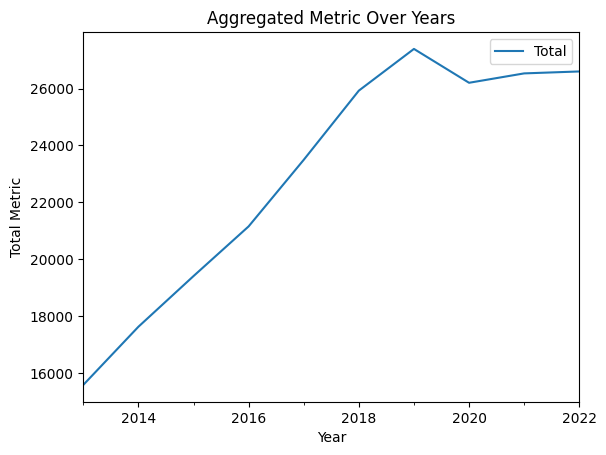

In [43]:
yearly_data_df.plot()
plt.title('Aggregated Metric Over Years')
plt.ylabel('Total Metric')
plt.xlabel('Year')
plt.show()

In [44]:
model = ARIMA(yearly_data_df, order=(1,1,1))
model_fit = model.fit()

c:\Users\Dewang\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Dewang\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Dewang\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [45]:
forecast = model_fit.forecast(steps=10)
print(forecast)

2023-01-01    26841.057299
2024-01-01    27039.844667
2025-01-01    27203.774229
2026-01-01    27338.958378
2027-01-01    27450.437688
2028-01-01    27542.368853
2029-01-01    27618.179685
2030-01-01    27680.696919
2031-01-01    27732.251617
2032-01-01    27774.766085
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [57]:
# Aggregate data by country and year
# First, melt the dataframe to long format
df_long = pd.melt(df, id_vars=['Country', 'University'], var_name='Year', value_name='Metric')

# Then, aggregate by country and year
country_yearly_data = df_long.groupby(['Country', 'Year']).sum().reset_index()

# Predicting the metric for each country using ARIMA
forecasts = {}

for country in country_yearly_data['Country'].unique():
    # Filter data for the country
    df_country = country_yearly_data[country_yearly_data['Country'] == country]
    
    # Ensure the data is in time series format
    df_country['Year'] = pd.to_datetime(df_country['Year'], format='%Y')
    df_country.set_index('Year', inplace=True)
    df_country = df_country['Metric']
    
    # Some countries might have too few data points to model; we check for this:
    if len(df_country) > 3:  # Ensuring enough data points
        try:
            model = ARIMA(df_country, order=(1,1,1))
            model_fit = model.fit()
            # Forecasting the next year
            forecast = model_fit.forecast(steps=3)
            forecasts[country] = forecast
        except Exception as e:
            print(f"Could not model {country} due to: {e}")
    else:
        print(f"Not enough data to model {country}")

C:\Users\Dewang\AppData\Local\Temp\ipykernel_13056\3371243555.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['Year'] = pd.to_datetime(df_country['Year'], format='%Y')
c:\Users\Dewang\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Dewang\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Dewang\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\

In [59]:
for country, forecast in forecasts.items():
    print(f"{country} forecast for the next 3 years:")
    for year, value in enumerate(forecast, start=2023):
        print(f"Year {year}: {value}")
    print()

(blank) forecast for the next 3 years:
Year 2023: 1.5648013084026642
Year 2024: 1.8625758591904418
Year 2025: 1.658830570408867

Afghanistan forecast for the next 3 years:
Year 2023: 4.999493725291512
Year 2024: 4.000031469747727
Year 2025: 4.999462256534632

Albania forecast for the next 3 years:
Year 2023: 4.458319832815276
Year 2024: 4.614730610960159
Year 2025: 4.569566816893611

Algeria forecast for the next 3 years:
Year 2023: 2.6571666453282585
Year 2024: 2.4600414120117584
Year 2025: 2.3466966715407183

Andorra forecast for the next 3 years:
Year 2023: 0.10277810207093394
Year 2024: 0.10040854958599019
Year 2025: 0.10046317969557353

Angola forecast for the next 3 years:
Year 2023: 1.0382093545430962
Year 2024: 1.0585071493799154
Year 2025: 1.0692898616283757

Antigua and Barbuda forecast for the next 3 years:
Year 2023: 2.9881861282773112
Year 2024: 2.9895160674179087
Year 2025: 2.989366350359927

Argentina forecast for the next 3 years:
Year 2023: 14.990133004733234
Year 2024